# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./data/beijing_pm2.5/beijing_pm2.5_1.csv',parse_dates=['date'],index_col=['date'])
df.head()

,No,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
date,,,,,,,,,
2010-01-01 00:00:00,1,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,3,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,4,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,5,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43824 entries, 2010-01-01 00:00:00 to 2014-12-31 23:00:00
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   pm2.5   41757 non-null  float64
 2   DEWP    43824 non-null  int64  
 3   TEMP    43824 non-null  float64
 4   PRES    43824 non-null  float64
 5   cbwd    43824 non-null  object 
 6   Iws     43824 non-null  float64
 7   Is      43824 non-null  int64  
 8   Ir      43824 non-null  int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 3.3+ MB


In [4]:
# pm2.5: PM2.5 concentration (ug/m^3) : 초미세먼지
# DEWP: Dew Point (â„ƒ)
# TEMP: Temperature (â„ƒ) : 온도
# PRES: Pressure (hPa) : 기압
# cbwd: Combined wind direction : 풍향
# Iws: Cumulated wind speed (m/s) : 풍속
# Is: Cumulated hours of snow
# Ir: Cumulated hours of rain

## 시각화

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

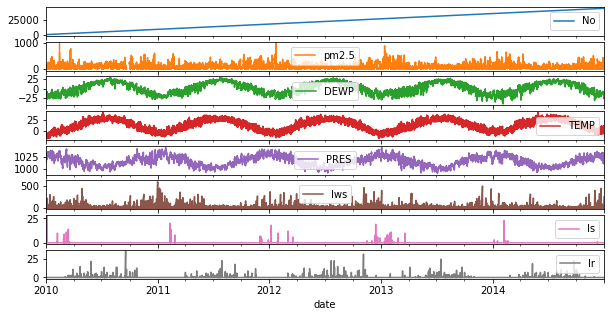

In [5]:
df.plot(figsize=(10,5),subplots=True)

<AxesSubplot:xlabel='pm2.5', ylabel='Count'>

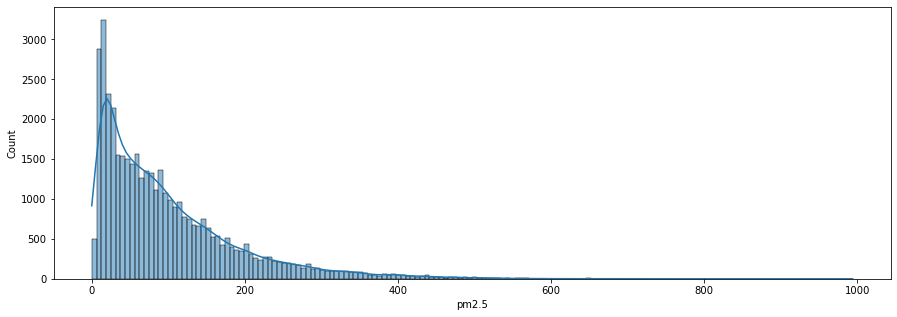

In [6]:
plt.figure(figsize=(15,5))
sns.histplot(df['pm2.5'],kde=True)

## 계절성 파악

In [7]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['hour'] = df.index.hour

In [8]:
df.head()

,No,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,year,month,day,hour
date,,,,,,,,,,,,,
2010-01-01 00:00:00,1,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010,1,1,0
2010-01-01 01:00:00,2,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010,1,1,1
2010-01-01 02:00:00,3,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010,1,1,2
2010-01-01 03:00:00,4,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010,1,1,3
2010-01-01 04:00:00,5,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010,1,1,4


<AxesSubplot:xlabel='year', ylabel='pm2.5'>

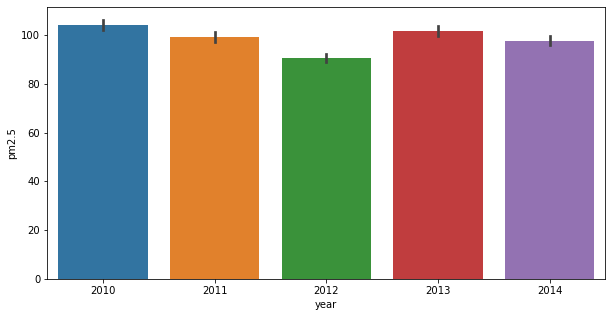

In [13]:
# 연별 그래프
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="year", y="pm2.5")

<AxesSubplot:xlabel='month', ylabel='pm2.5'>

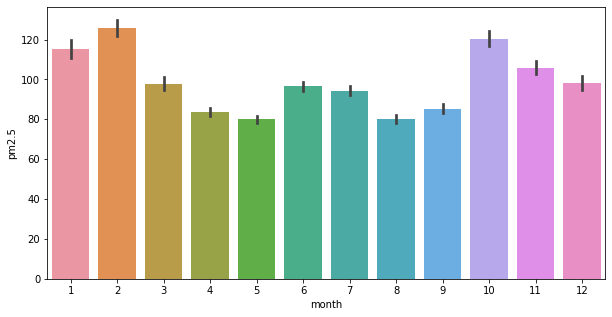

In [10]:
# 월별 그래프
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="month", y="pm2.5")

<AxesSubplot:xlabel='year', ylabel='pm2.5'>

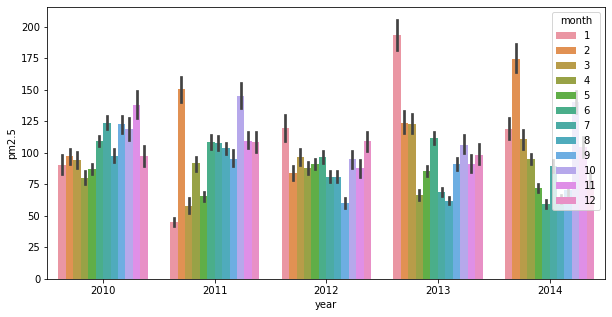

In [9]:
# 연, 월별 그래프
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="year", y="pm2.5", hue="month")

<AxesSubplot:xlabel='month', ylabel='pm2.5'>

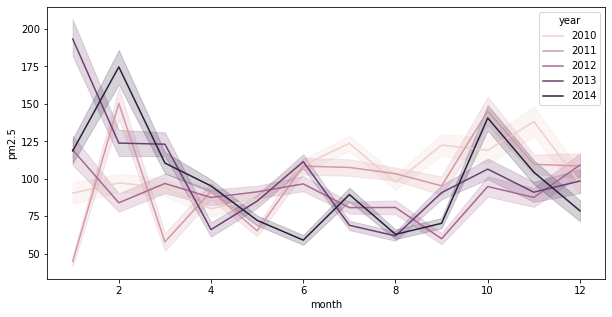

In [15]:
# 월 흐름에 따른 연데이터 그래프
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="month", y="pm2.5", hue='year')

<AxesSubplot:xlabel='year', ylabel='pm2.5'>

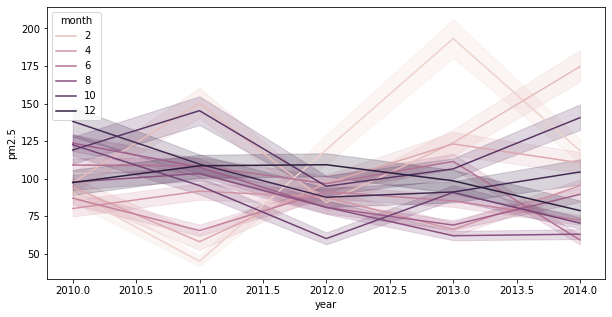

In [12]:
# 연 흐름에 따른 월 데이터 그래프
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="year", y="pm2.5", hue="month")

<AxesSubplot:xlabel='hour', ylabel='pm2.5'>

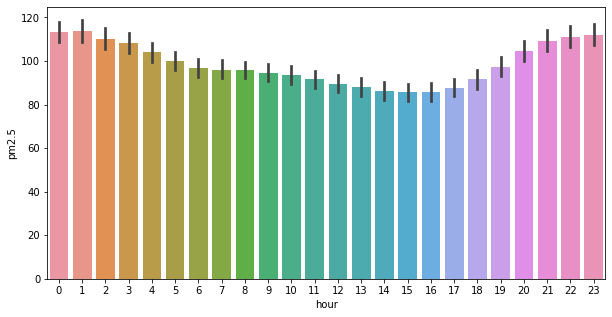

In [25]:
# 하루 시간별 그래프
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="hour", y="pm2.5")

## 상관계수

<AxesSubplot:>

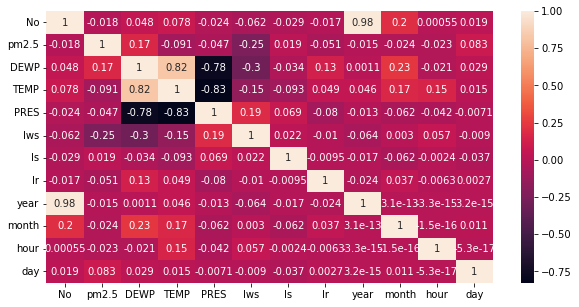

In [31]:
df_corr = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df_corr,annot=True)

## pairplot

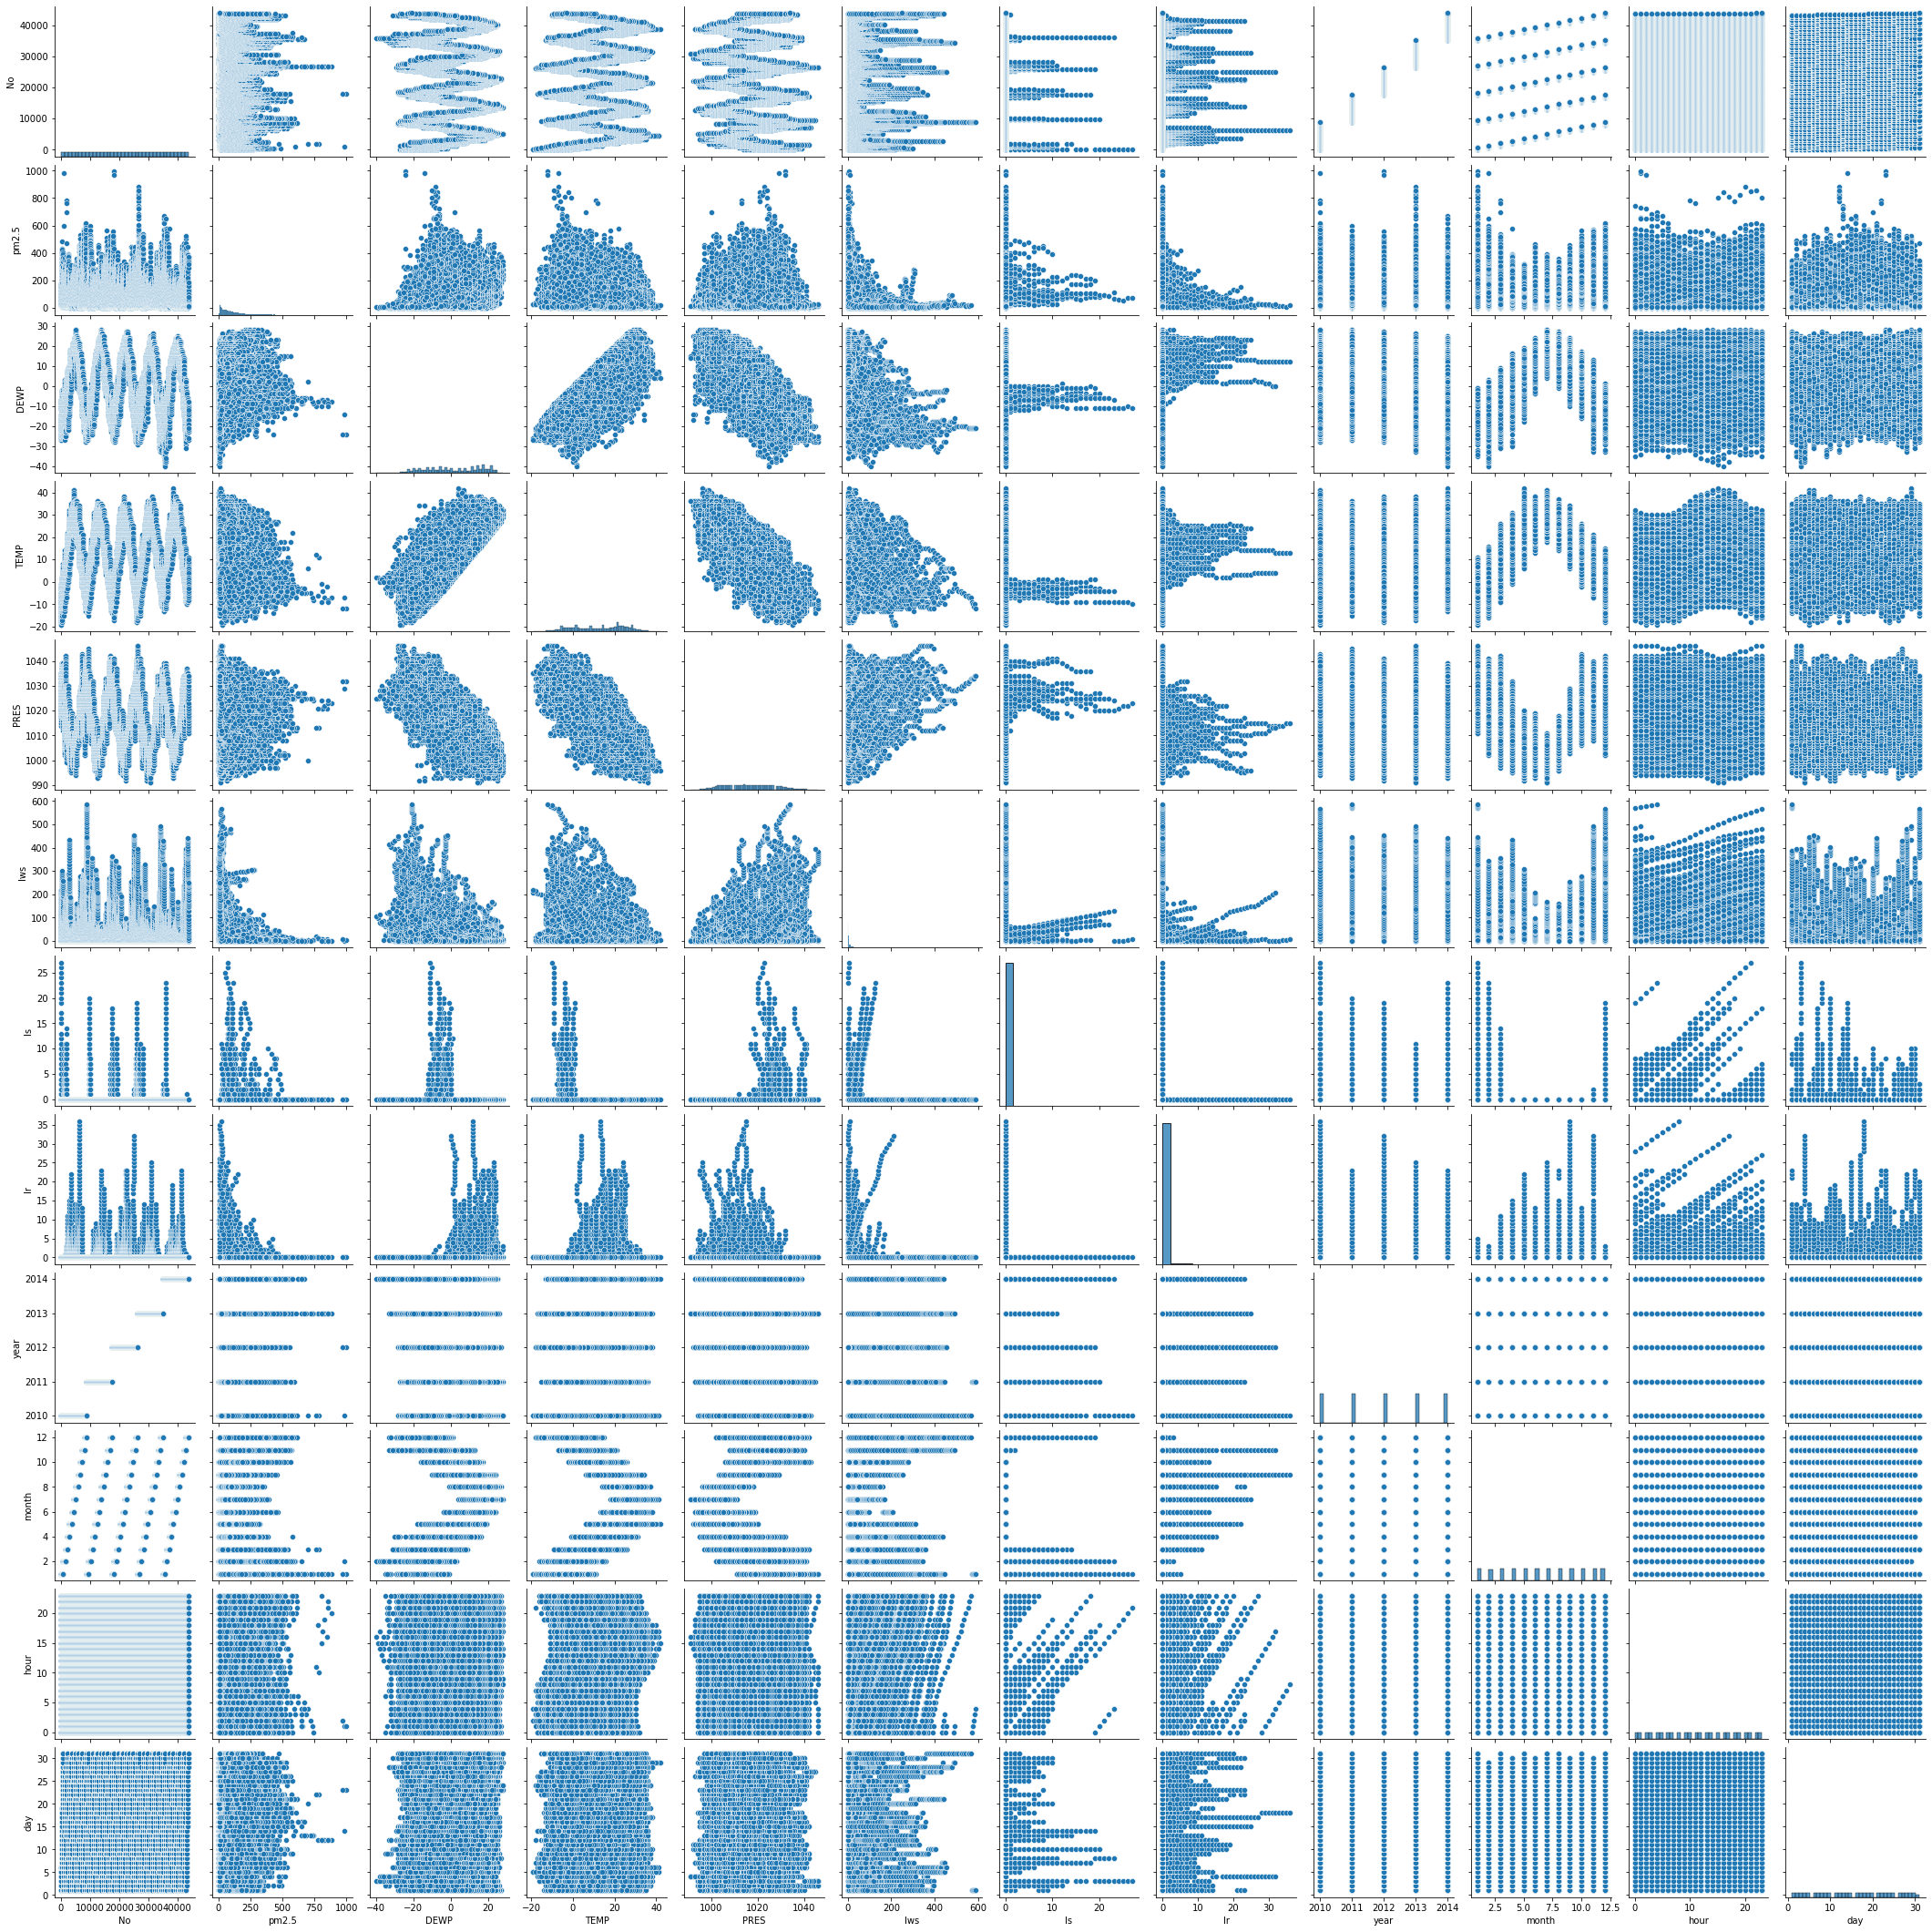

In [26]:
sns.pairplot(df)